# FU Ori Accertion Disks KHH88

### Caltech Summer 2019

This notebook implements a class structure to make it easier for all of the plots from the previous codes to be visualized. Started on 24 June 2019.

The purpose of this notebook is to show how a class structure makes it reasonable to incorporate many features that I would like to extract out of an FU Ori accretion disk. Specifically, I recreate Table 3 of KHH88. I can plot:
1. $T(r)$, the temperature evaluated at the average distance of each annulus from the center, and make this match  the values of KHH88.
2. $L_\nu$ or $L_\lambda$ of each annulus.
3. A model spectrum of the entire disk. 
4. A total luminosity of the entire disk.
5. The fractional fluxes due to each annulus of the disk. 

The plots all show that blackbodies are a good first approximation to matching KHH88, but the model spectrum currently doesn't have lines, which will come about in the next iteration of the code that will incorporate stellar atmospheres.

### Imports 

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import integrate
import astropy.io.fits as fits
import matplotlib.pyplot as plt

### Constants (astronomy is in cgs, right?)

In [2]:
G = 6.67259e-8
SIG_SB = 5.67051e-5
M_SUN = 1.99e33
R_SUN = 6.96e10
L_SUN = 3.839e33
h_PLANCK = 6.6260755e-27
c_LIGHT = 2.99792458e10
k_BOLTZ = 1.380658e-16

## Storing all functions (maybe do this in a separate .py file and import it?)

Values from Table 3 in KHH88

In [3]:
KHH_RAD = np.array([1.5, 1.73, 1.95, 2.14, 2.26, 2.37,\
                   2.55, 2.77, 2.98, 3.20, 3.85, 4.60,\
                   4.86, 5.19, 5.70, 6.28, 6.96, 7.77,\
                   8.73, 9.91, 11.37, 13.22, 15.64,\
                   18.89, 23.46, 28.16, 32.35, 37.74,\
                   44.86, 54.64, 68.77, 90.64, 128.19,\
                   204.84, 429.26])
KHH_TEMP = np.array([6590, 6370, 6150, 5800, 5650,\
                    5500, 5370, 5100, 4900, 4700,\
                    4500, 3750, 3600, 3500, 3300,\
                    3100, 2900, 2700, 2500, 2300,\
                    2100, 1900, 1700, 1500, 1300,\
                    1100, 1000, 900, 800, 700, 600,\
                    500, 400, 300, 200])

In [4]:
col1 = np.array([0.63,
0.12,
0.13,
0.04,
0.02,
0.02,
0.03,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [5]:
col2 = np.array([0.40,
0.12,
0.19,
0.07,
0.04,
0.02,
0.04,
0.03,
0.01,
0.01,
0.03,
0.01,
0.01,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [6]:
col3 = np.array([0.31,
0.15,
0.14,
0.09,
0.04,
0.03,
0.04,
0.04,
0.02,
0.02,
0.06,
0.03,
0.01,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0])

In [7]:
col4 = np.array([0.21,
0.14,
0.12,
0.09,
0.04,
0.04,
0.05,
0.05,
0.03,
0.03,
0.07,
0.05,
0.01,
0.02,
0.02,
0.01,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [8]:
col5 = np.array([0.16,
0.12,
0.10,
0.09,
0.04,
0.04,
0.05,
0.05,
0.04,
0.03,
0.08,
0.07,
0.02,
0.02,
0.02,
0.02,
0.02,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [9]:
col6 = np.array([0.13,
0.11,
0.09,
0.08,
0.04,
0.04,
0.04,
0.04,
0.03,
0.03,
0.08,
0.08,
0.02,
0.03,
0.03,
0.03,
0.03,
0.02,
0.02,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [10]:
col7 = np.array([0.12,
0.08 ,
0.07 ,
0.06 ,
0.03 ,
0.03,
0.04 ,
0.04 ,
0.03 ,
0.03 ,
0.08 ,
0.10 ,
0.03 ,
0.04 ,
0.04 ,
0.04 ,
0.03 ,
0.03 ,
0.02 ,
0.02 ,
0.01 ,
0.01 ,
0.01 ,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [11]:
col8 = np.array([0.08,
0.05,
0.05,
0.04,
0.02,
0.02,
0.03,
0.03,
0.02,
0.03,
0.07,
0.11,
0.03,
0.04,
0.05,
0.05,
0.05,
0.04,
0.04,
0.04,
0.03,
0.03,
0.02,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.,
0.])

In [12]:
col9 = np.array([0.03,
0.02,
0.02,
0.02,
0.01,
0.01,
0.01,
0.02,
0.01,
0.01,
0.04,
0.08,
0.03,
0.04,
0.04,
0.04,
0.04,
0.05,
0.05,
0.06,
0.06,
0.06,
0.06,
0.06,
0.05,
0.03,
0.01,
0.01,
0.01,
0.,
0.,
0.,
0.,
0.,
0.])

In [13]:
col10 = np.array([0.02,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.02,
0.05,
0.02,
0.02,
0.02,
0.03,
0.03,
0.03,
0.04,
0.05,
0.05,
0.06,
0.07,
0.08,
0.08,
0.06,
0.04,
0.04,
0.03,
0.03,
0.02,
0.01,
0.,
0.,
0.])

In [14]:
col11 = np.array([0.08,
0.05,
0.05,
0.04,
0.02,
0.02,
0.03,
0.03,
0.03,
0.03,
0.07,
0.06,
0.02,
0.02,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.03,
0.02,
0.02,
0.02,
0.02,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01,
0.01])

In [15]:
khh_arr_draft = np.array([col1, col2, col3, col4, col5, col6, col7, col8, col9, col9,col10, col11])

In [16]:
KHH_FLUXES = np.transpose(khh_arr_draft)

### Temperature profile functions

In the limit of steady accretion and being an optically thick disk, Hartmann and Kenyon (1996) provide
$$T^4 = \dfrac{3GM_* \dot{M}}{8\pi\sigma r^3}\Big[1 - \Big(\dfrac{r_i}{r}\Big)^{1/2}\Big] $$
where $R_i$ is the inner disk radius.

There is an obvious maximum temperature, $T_\text{max}$, that can be seen when plotting $T(r)$, which is unphysical, so setting all radii below $r_\text{max}$ to have that temperature is not an unreasonable first approximation.

In [17]:
def tempKepDisk(r, r_inner, m_dot, m_star):
    term1 = 3*G*m_star*m_dot / (8 * np.pi * SIG_SB * (r**3))
    term2 = (1 - (r_inner/r)**(1/2))
    return (term1 * term2)**(1/4)

def tempKepDiskNeg(r, r_inner, m_dot, m_star):
    return -tempKepDisk(r, r_inner, m_dot, m_star)

def findMaxTemp(r_inner, m_dot, m_star):
    res = minimize(tempKepDiskNeg, 2*r_inner, args=(r_inner, m_dot, m_star), method='Nelder-Mead')
    return (res.x[0], -res.fun)

def tempFUOriDisk(r, r_inner, m_dot, m_star):
    # Doesn't read in as arrays for some reason,
    # doing this element-wise...
    res = np.zeros(len(r))
    for i in range(len(r)):
        if r[i] <= findMaxTemp(r_inner, m_dot, m_star)[0]:
            res[i] = findMaxTemp(r_inner, m_dot, m_star)[1]
        else:
            res[i] = tempKepDisk(r[i], r_inner, m_dot, m_star)
    return res

### Annuli-generating functions

Currently setting as equal spacing out to the edge of the disk. Areas obviously get larger the farther out you go, but it may be wise to make the annuli widths a function of the distance from the center.

In [18]:
def generateDistArrays(r_inner, r_outer, r_sep):
    r_list = np.arange(r_inner, r_outer, r_sep)
    r_tup = []
    for i in range(len(r_list)-1):
        r_tup.append((r_list[i], r_list[i+1]))
    r_tup = np.array(r_tup)
    r_b = np.array([i[1] for i in r_tup])
    r_a = np.array([i[0] for i in r_tup])
    r_avg = np.mean(r_tup, axis=1)
    return (r_tup, r_avg, r_a, r_b)

In [19]:
def generateListDistArrays(points):
    r_list = points
    r_tup = []
    for i in range(len(r_list)-1):
        r_tup.append((r_list[i], r_list[i+1]))
    r_tup = np.array(r_tup)
    r_b = np.array([i[1] for i in r_tup])
    r_a = np.array([i[0] for i in r_tup])
    r_avg = np.mean(r_tup, axis=1)
    return (r_tup, r_avg, r_a, r_b)

### Luminosity functions

I calculate the luminosity of that annulus using:
$$L_\nu =A_\text{annulus} \pi B_\nu = A_\text{annulus} \cdot \pi \cdot\dfrac{2h \nu^3}{c^2}\dfrac{1}{\exp(\frac{h\nu}{k_B T}) - 1}$$
where $L_\nu$ is in erg/sec/Hz.

However, I need to make sure that I use 
$$A_\text{annulus} = 2\pi(r_b^2 - r_a^2)$$
where I will supply tuples of $(r_a, r_b)$, with the difference between the two increasing at farther distances from the center, and I will use the temperature at $r_\text{avg} \equiv (r_b - r_a)/2$.

Note that I can also use $L_\lambda$ appropriately as:
$$L_\lambda = 2\pi(r_b^2 - r_a^2)\cdot\pi\cdot\dfrac{2hc^2}{\lambda^5}\dfrac{1}{\exp(\frac{hc}{\lambda k_B T}) - 1}$$
where $L_\lambda$ is in erg/sec/cm.

**Note**: The function is not immediately below, but is included within the class, for total luminosity of the accretion disk. 
$$j = \sigma T^4 \Longrightarrow L^\text{TOT} = \sigma\sum_{i}A_iT_i^4 $$
where the sum is over each annulus $i$.

In [20]:
def lumWaveAnnulus(wavelength, temp, r_b, r_a):
    term1 = 2*np.pi *(r_b**2 - r_a**2)*np.pi
    term2 = 2*h_PLANCK*(c_LIGHT**2)*(wavelength**(-5))
    term3 = (np.exp(h_PLANCK*c_LIGHT/(wavelength*k_BOLTZ*temp))-1)**(-1)
    return term1*term2*term3

def lumFreqAnnulus(freq, temp, r_b, r_a):
    term1 = 2*np.pi *(r_b**2 - r_a**2)*np.pi
    term2 = 2*h_PLANCK*(c_LIGHT**(-2))*(freq**3)
    term3 = (np.exp(h_PLANCK*freq/(k_BOLTZ*temp))-1)**(-1)
    return term1*term2*term3

## Setting up the class FUOri

In [21]:
class FUOri:

    # Initializer / Instance Attributes
    def __init__(self, r_star, r_inner, r_outer, m_star, m_dot):
        self.r_star = r_star
        self.r_inner = r_inner
        self.r_outer= r_outer
        self.m_star = m_star
        self.m_dot = m_dot
        
        # Distance arrays
        self.distances = 0
        
        # KHH88 "true vales"
        self.true_rad = 0
        self.true_temp = 0
        self.true_fluxes = 0

    # instance methods
    
    # Setting the distance arrays, DO THIS FIRST!
    def makeDistArrays(self, r_sep):
        self.distances = generateDistArrays(self.r_inner, self.r_outer, r_sep)
        
    def makeListDistArrays(self, points):
        self.distances = generateListDistArrays(points)
    
    # Assigning "true" values from KHH88
    def assignTrueTable(self, rad, temp, fluxes):
        self.true_rad = rad
        self.true_temp = temp
        self.true_fluxes = fluxes
    
    # T(r) of each annulus
    def getTemperature(self):
        r = self.distances[1]
        return tempFUOriDisk(r, self.r_inner, self.m_dot, self.m_star)

    # Luminosity contribution of each annulus
    def getLuminosityWave(self, wave):
        r_tup, r_avg, r_a, r_b = self.distances
        temps = self.getTemperature()
        return lumWaveAnnulus(wave, temps, r_b, r_a)
    
    def getLuminosityFreq(self, freq):
        r_tup, r_avg, r_a, r_b = self.distances
        temps = self.getTemperature()
        return lumFreqAnnulus(freq, temps, r_b, r_a)
    
    # Model spectrum
    def getModelSpectrumWave(self, wave_lower, wave_upper):
        r_tup, r_avg, r_a, r_b = self.distances
        waves = np.linspace(wave_lower, wave_upper, 1000)
        temp = tempFUOriDisk([r_avg[0]], self.r_inner, self.m_dot, self.m_star)
        lum = lumWaveAnnulus(waves, temp, r_b[0], r_a[0])
        for i in range(1,len(r_avg)):
            temp = tempFUOriDisk([r_avg[i]], self.r_inner, self.m_dot, self.m_star)
            lum += lumWaveAnnulus(waves, temp, r_b[i], r_a[i])
        return (waves,lum)
    
    def getModelSpectrumFreq(self, freq_lower, freq_upper):
        r_tup, r_avg, r_a, r_b = self.distances
        freqs = np.linspace(freq_lower, freq_upper, 1000)
        temp = tempFUOriDisk([r_avg[0]], self.r_inner, self.m_dot, self.m_star)
        lum = lumFreqAnnulus(freqs, temp, r_b[0], r_a[0])
        for i in range(1,len(r_avg)):
            temp = tempFUOriDisk([r_avg[i]], self.r_inner, self.m_dot, self.m_star)
            lum += lumFreqAnnulus(freqs, temp, r_b[i], r_a[i])
        return (freqs,lum)
    
    # Fractional fluxes 
    def getFracFluxes(self, wave):
        r_tup, r_avg, r_a, r_b = self.distances
        temps = tempFUOriDisk(r_avg, self.r_inner, self.m_dot, self.m_star)
        lums = lumWaveAnnulus(wave, temps, r_b, r_a)
        tot = np.sum(lums)
        fracs = lums/tot
        return (temps, fracs)
    
    # Total luminosity
    def getTotalLuminosity(self):
        r_tup, r_avg, r_a, r_b = self.distances
        lumTot = 0
        for i in range(len(r_avg)):
            temp = tempFUOriDisk([r_avg[i]], self.r_inner, self.m_dot, self.m_star)
            lumTot += 2*np.pi*(r_b[i]**2 - r_a[i]**2)*SIG_SB*temp**4
        return lumTot[0]
    
    # "True values" from KHH88:
    def getTrueTempProfile(self):
        return (self.true_rad, self.true_temp)
    
    def getTrueFracFluxes(self, col):
        return self.true_fluxes[:,col]

## Making an instance of the class FUOri

This is fitting the values to V1057 from Table 3 of KHH88. Seems like a good option for the first try.

Making the list of points from KHH88 serve as the endpoints of the annuli. Note that I need to add the first point at one stellar radius.

In [22]:
newlis = np.zeros(len(KHH_RAD)+1)
newlis[0] = 1.
for i in range(len(KHH_RAD)):
    newlis[i+1] = KHH_RAD[i]

Giving the values to fit the temperature profile

In [23]:
R_STAR = 4 * R_SUN

v1057 = FUOri(R_STAR, R_STAR, 30*R_STAR, 0.4*M_SUN, 1 * 1e-4 * M_SUN / 3.154e7)

# Equal spacing of annuli
# v1057.makeDistArrays(0.5*R_STAR)

# Spacing of annuli matching KHH88
v1057.makeListDistArrays(newlis*R_STAR)

v1057.assignTrueTable(KHH_RAD, KHH_TEMP, KHH_FLUXES)

In [24]:
r_avg_test = v1057.distances[1]

## Generating plots 

Not sure how to make this a separate routine, or how a class structure would work for this, but this is fine for now.

### Temperature profile

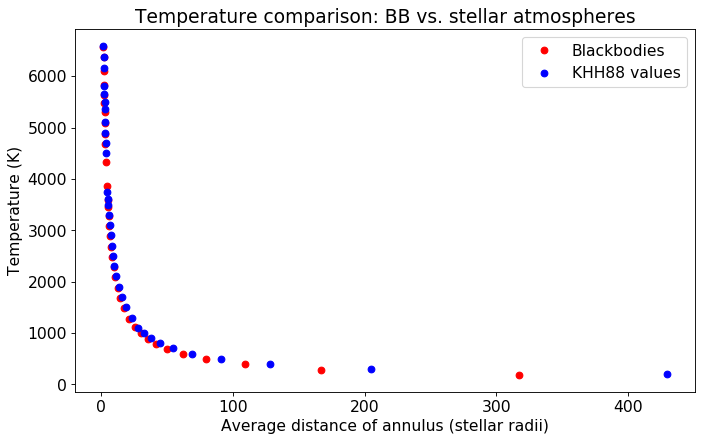

In [25]:
fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(r_avg_test/R_STAR, v1057.getTemperature(), 'ro', label='Blackbodies')
plt.plot(v1057.true_rad, v1057.true_temp, 'bo', label='KHH88 values')
plt.xlabel('Average distance of annulus (stellar radii)')
# plt.xticks(ticks, np.array(ticks, dtype=str))
plt.ylabel('Temperature (K)')
plt.title('Temperature comparison: BB vs. stellar atmospheres')
plt.legend()
plt.show()

### Luminosity of different annuli at different wavelengths

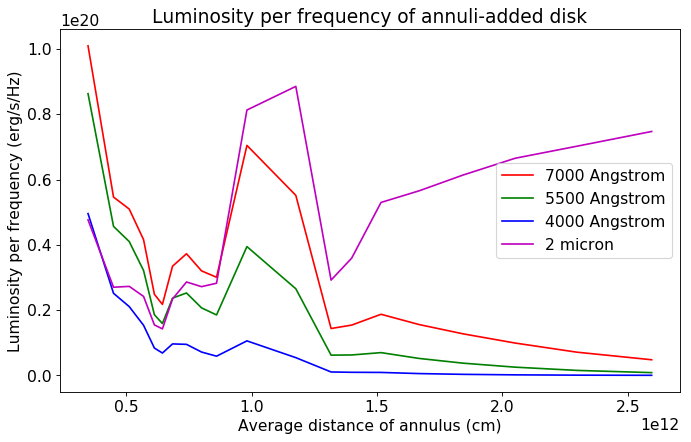

In [26]:
COL=20

fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(r_avg_test[:COL], v1057.getLuminosityFreq(c_LIGHT/7000e-8)[:COL], 'r-', label='7000 Angstrom')
plt.plot(r_avg_test[:COL], v1057.getLuminosityFreq(c_LIGHT/5500e-8)[:COL], 'g-', label='5500 Angstrom')
plt.plot(r_avg_test[:COL], v1057.getLuminosityFreq(c_LIGHT/4000e-8)[:COL], 'b-', label='4000 Angstrom')
plt.plot(r_avg_test[:COL], v1057.getLuminosityFreq(c_LIGHT/20000e-8)[:COL], 'm-', label='2 micron')


plt.xlabel('Average distance of annulus (cm)')
# plt.xticks(ticks, np.array(ticks, dtype=str))
plt.ylabel('Luminosity per frequency (erg/s/Hz)')
plt.title('Luminosity per frequency of annuli-added disk')
plt.legend()
plt.show()

### Making a model spectrum by summing the annuli

In [27]:
modSpec = v1057.getModelSpectrumWave(3000e-8, 20000e-8)

BB_TEST = 5000

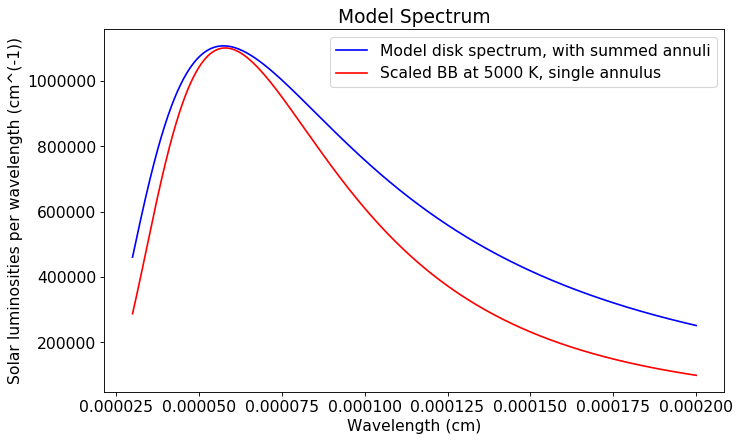

In [28]:
fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(modSpec[0], modSpec[1]/L_SUN, 'b-', label='Model disk spectrum, with summed annuli')
plt.plot(modSpec[0], 0.024*lumWaveAnnulus(modSpec[0], BB_TEST, v1057.r_outer, v1057.r_inner)/L_SUN, \
         'r-', label='Scaled BB at '+ str(BB_TEST) +' K, single annulus')

plt.xlabel('Wavelength (cm)')
plt.ylabel('Solar luminosities per wavelength (cm^(-1))')
plt.title('Model Spectrum')
plt.legend()
plt.show()

In [29]:
modSpec = v1057.getModelSpectrumFreq(c_LIGHT/500000e-8, c_LIGHT/3000e-8)

BB_TEST = 5000

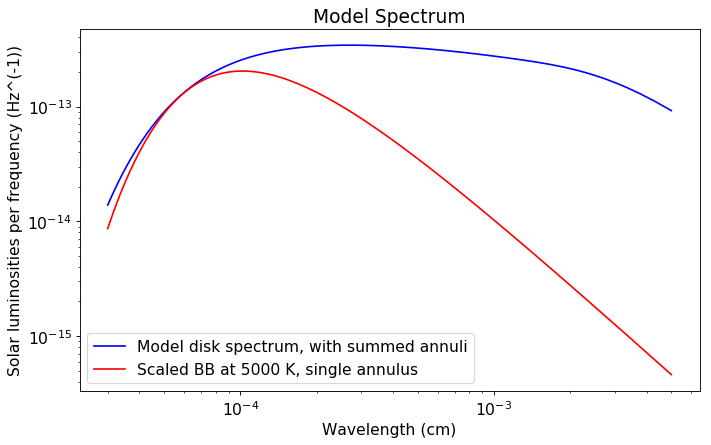

In [30]:
fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.loglog(c_LIGHT/modSpec[0], modSpec[1]/L_SUN, 'b-', label='Model disk spectrum, with summed annuli')
plt.loglog(c_LIGHT/modSpec[0], 0.024*lumFreqAnnulus(modSpec[0], BB_TEST, v1057.r_outer, v1057.r_inner)/L_SUN, \
         'r-', label='Scaled BB at '+ str(BB_TEST) +' K, single annulus')

plt.xlabel('Wavelength (cm)')
# plt.xlim(3000e-8, 50000e-8)
plt.ylabel('Solar luminosities per frequency (Hz^(-1))')
plt.title('Model Spectrum')
plt.legend()
plt.show()

## Total luminosity of the entire disk in $L_\odot$

In [31]:
v1057.getTotalLuminosity()/L_SUN

157.8743218222616

### Comparing fractional fluxes of model and KHH88

In [32]:
fracs1 = v1057.getFracFluxes(3500e-8)
fracs2 = v1057.getFracFluxes(6400e-8)
fracs3 = v1057.getFracFluxes(12500e-8)

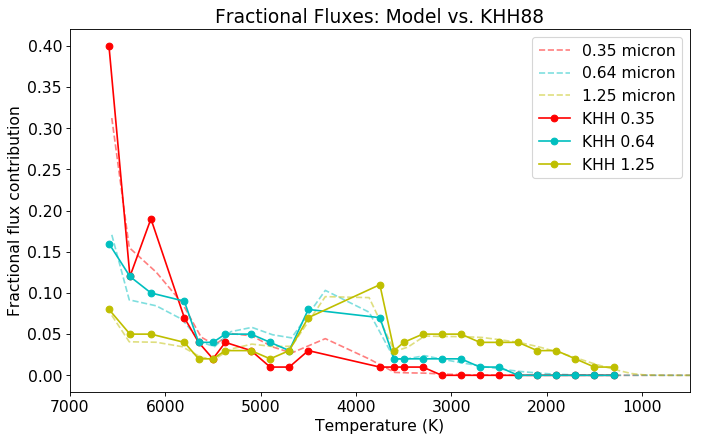

In [37]:
fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})
plt.plot(fracs1[0], fracs1[1], 'r--', alpha=0.5, label='0.35 micron')
plt.plot(fracs2[0], fracs2[1], 'c--', alpha=0.5, label='0.64 micron')
plt.plot(fracs3[0], fracs3[1], 'y--', alpha=0.5, label='1.25 micron')

plt.plot(v1057.true_temp[:25], v1057.getTrueFracFluxes(1)[:25], 'r-o', label='KHH 0.35')
plt.plot(v1057.true_temp[:25], v1057.getTrueFracFluxes(4)[:25], 'c-o', label='KHH 0.64')
plt.plot(v1057.true_temp[:25], v1057.getTrueFracFluxes(7)[:25], 'y-o', label='KHH 1.25')

plt.title('Fractional Fluxes: Model vs. KHH88')
plt.xlim(7000,500)
plt.xlabel('Temperature (K)')
plt.ylabel('Fractional flux contribution')
plt.legend()
plt.show()